In [1]:
#from google.colab import drive
#drive.mount('/content/drive')


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import Birch, MiniBatchKMeans
import sklearn.metrics
from collections import Counter


# Load the CSV file
#df = pd.read_csv("/content/drive/MyDrive/dmg ass3/covtype_train.csv")
df = pd.read_csv("covtype_train.csv")

df.drop_duplicates(keep=False,inplace=True)

df = df.astype({"Elevation":'category','Aspect':'category','Slope':'category','Hillshade_9am':'category','Hillshade_Noon':'category','Horizontal_Distance_To_Fire_Points':'category'})
for c in df.columns:
    df[c] = df[c].astype('category').cat.codes
print(df.shape)
newdf=df


(2239, 11)


In [3]:
model = Birch(branching_factor = 20, n_clusters = 7, threshold = 1.5)
  

In [4]:
#for k=7
reduced_data = PCA(n_components=2).fit_transform(newdf)
model.fit(reduced_data)

centroids = model.subcluster_centers_

E:\programs\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
E:\programs\anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


[[ 0.68494156  0.06476856]
 [-0.13950582 -0.0706801 ]
 [-0.2147147   0.08327481]
 [ 0.37597863  0.01924579]
 [-0.35994927 -0.00490497]
 [ 0.04114547 -0.2432552 ]
 [-0.21809382 -0.06236326]]


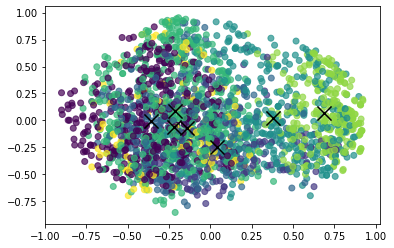

In [5]:
df.drop_duplicates(keep=False,inplace=True)

features=['Elevation', 'Aspect', 'Slope', 'Hillshade_9am','Hillshade_Noon',
      'Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Fire_Points', 'Soil_Type','Wilderness']

#scaling && normalising      
X=df[features]
z=StandardScaler()
X[features]=z.fit_transform(X)
normalized_df = normalize(X[features]) 
normalized_df = pd.DataFrame(normalized_df)

pca = PCA(n_components = 2) 
X_trans = pca.fit_transform(normalized_df) 
X_trans = pd.DataFrame(X_trans ) 
X_trans.columns = ['P1', 'P2'] 

cluster=model.predict(reduced_data)
cluster
X['cluster']=cluster

plt.scatter(X_trans.iloc[:, 0], X_trans.iloc[:, 1], c = cluster, alpha = 0.7)
x,y=X_trans['P1'],X_trans['P2']
X_trans['cluster']=cluster
X_trans.cluster.unique()
X_trans.groupby('cluster').nunique()
centroid=[]
for i in X_trans.cluster.unique():
  l1=[]
  l1=X_trans[X_trans.cluster == i ]
  c1=l1['P1'].sum()/len(l1)
  c2=l1['P2'].sum()/len(l1)
  centroid.append([c1,c2])
centroid = np.array(centroid)
print(centroid)                    
plt.scatter(centroid[:,0],centroid[:,1], c="black", s=200, marker=('x'))
plt.show()                   


Comparison of true labels with cluster distributions Q1(3Part)

In [6]:
#Giving clusters labels according to the majority data points belonging there
cluster_labels = []
for i in range(model.n_clusters):
  dist = np.unique(df['target'][cluster==i], return_counts=True)
  #print(dist)
  cluster_labels.append(dist[0][np.argmax(dist[1])])
cluster_labels

[0, 1, 1, 1, 1, 2, 4]

In [7]:
#Giving predicted clusters labels according to the cluster they belong
predict_labels_data = np.array([cluster_labels[i] for i in cluster])
predict_labels_data

array([2, 1, 1, ..., 1, 2, 0], dtype=int8)

In [11]:
sklearn.metrics.accuracy_score(df['target'], predict_labels_data)

0.47967842786958464

Q3 part count of true value and predicted value

In [9]:
c = Counter( df.target)

print( c.items() )

dict_items([(3, 38), (1, 781), (6, 233), (4, 135), (5, 149), (2, 197), (0, 706)])


In [10]:
c = Counter( predict_labels_data)
print( c.items() )

dict_items([(2, 280), (1, 1433), (0, 401), (4, 125)])
